In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Amazon Sales Analysis/')
file_path = "Amazon Sale Report.csv"
data = pd.read_csv(file_path)

- Display basic information about the dataset to understand its structure and identify potential issues
- This helps us see the data types, number of non-null values, and memory usage, which is crucial for identifying missing or incorrect data types.
- By displaying the first few rows, we can get an idea of the columns, data types, and potential anomalies.

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
data.describe()


,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


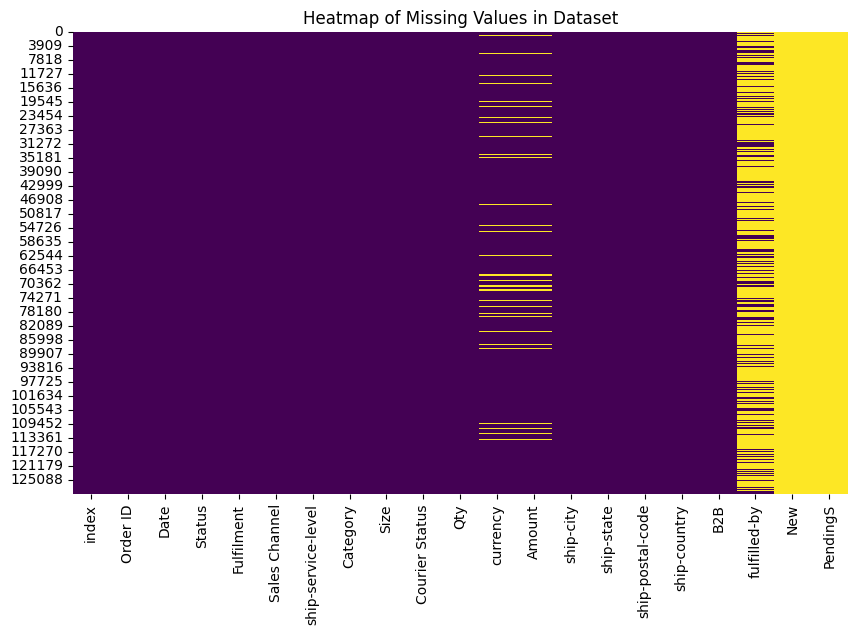

In [6]:
# heatmaps help in understanding which columns have missing data and need cleaning.
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show()

Columns such as 'index', 'New', and 'PendingS' seem irrelevant based on their names and initial exploration.
- 'index' appears to be a redundant identifier as pandas already provides an index.
- 'New' and 'PendingS' have all null values, making them irrelevant for analysis.
remove these columns during the cleaning process.

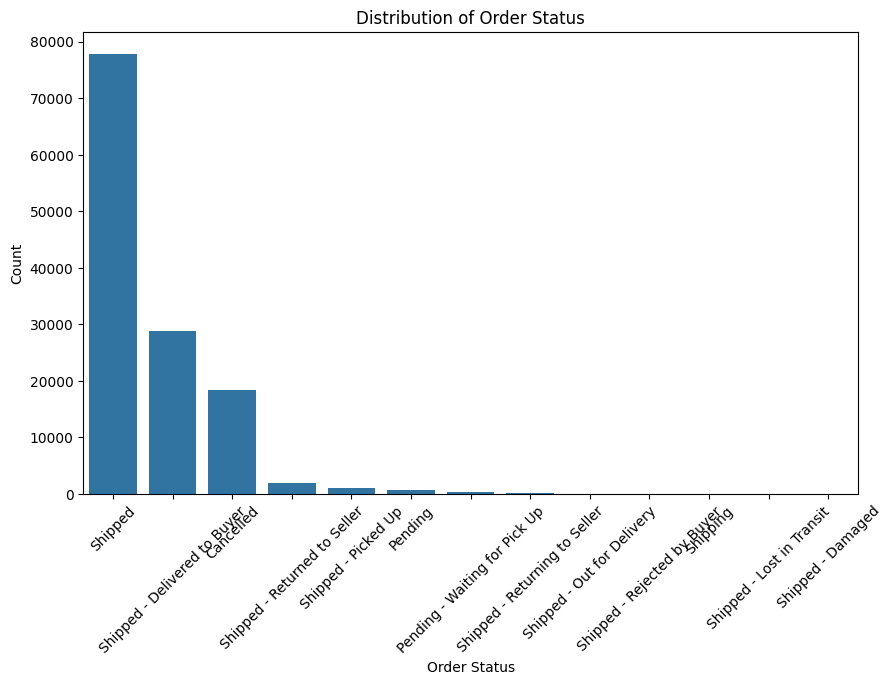

In [7]:
# Plot the distribution of order status to understand the proportion of different statuses
# This helps us identify the most common order statuses, such as 'Shipped', 'Cancelled', etc., which may be useful for analyzing order fulfillment efficiency.
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=data, order=data['Status'].value_counts().index)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

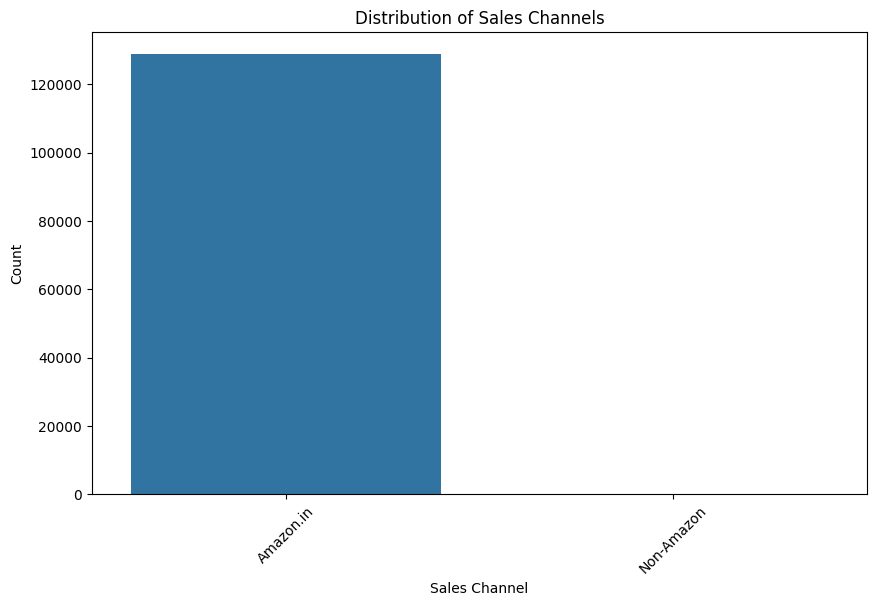

In [8]:
# Visualize the sales channel distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales Channel', data=data, order=data['Sales Channel'].value_counts().index)
plt.title('Distribution of Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

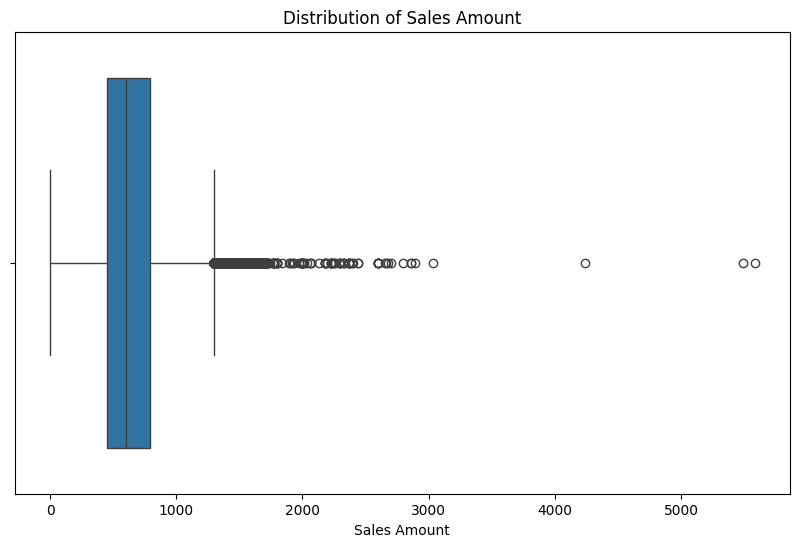

In [9]:
# Plot sales amount distribution to identify any outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Amount', data=data)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.show()

- There are several outliers with significantly higher sales amounts, suggesting a small number of high-value transactions.
- The majority of sales are concentrated below 1000, indicating a positive skew in the data.
- Outliers may need special handling, such as separate analysis or removal, to avoid distorting summary statistics like the mean.

In [10]:
# These columns have been identified as redundant or having no meaningful data, so they are removed to simplify the dataset.
data_cleaned = data.drop(columns=['index', 'New', 'PendingS'])

# Converting 'Date' to datetime format allows for easier analysis and visualization of sales trends over time.
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Rows with invalid dates (NaT) are dropped, as they cannot be used for time-based analysis.
data_cleaned.dropna(subset=['Date'], inplace=True)

# missing values in 'fulfilled-b' are replaced with 'Unknown' to maintain data consistency while not losing rows with valuable information.
data_cleaned['fulfilled-by'].fillna('Unknown', inplace=True)

# Since 'Amount' and 'currency' are key to understanding sales, rows with missing values in these columns are removed.
data_cleaned.dropna(subset=['Amount', 'currency'], inplace=True)

# verify that the dataset is now clean and ready for further analysis, with no irrelevant columns or major missing values.
data_cleaned.info()
data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 121176 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            121176 non-null  object        
 1   Date                121176 non-null  datetime64[ns]
 2   Status              121176 non-null  object        
 3   Fulfilment          121176 non-null  object        
 4   Sales Channel       121176 non-null  object        
 5   ship-service-level  121176 non-null  object        
 6   Category            121176 non-null  object        
 7   Size                121176 non-null  object        
 8   Courier Status      121176 non-null  object        
 9   Qty                 121176 non-null  int64         
 10  currency            121176 non-null  object        
 11  Amount              121176 non-null  float64       
 12  ship-city           121143 non-null  object        
 13  ship-state          121143 non-nul

<ipython-input-10-6e6367c36c9b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')
<ipython-input-10-6e6367c36c9b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['fulfilled-by'].fillna('Unknown', inplace=True)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown


<ipython-input-11-7d05bd901c52>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Amount', data=data_cleaned, ci=None)


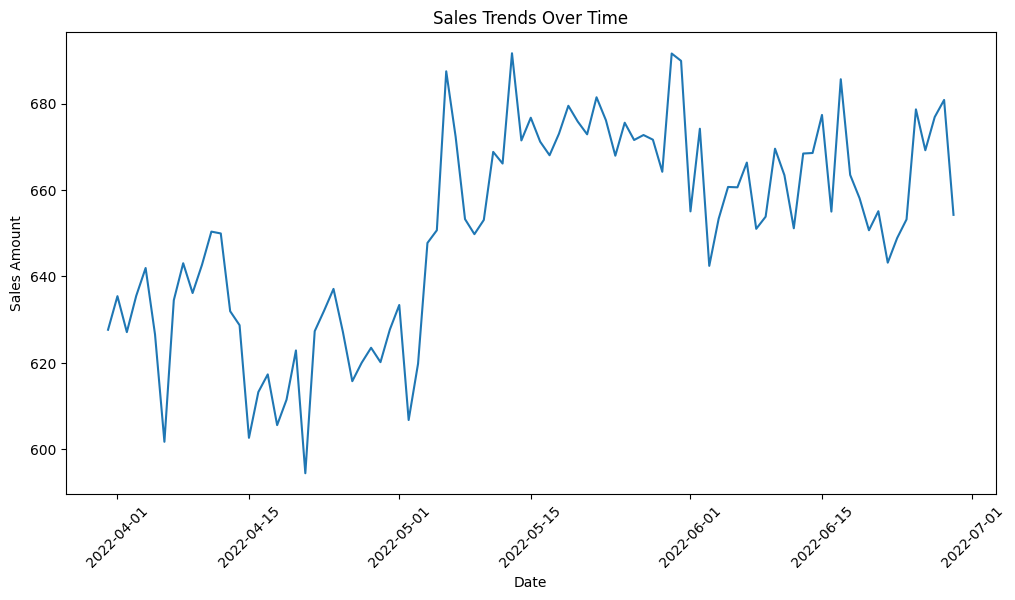

In [11]:
# Exploratory Data Analysis (EDA)
# This line plot helps visualize how sales amount changes over time, which can provide insights into seasonality or trends.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Amount', data=data_cleaned, ci=None)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Derive new features: Total Sales per City and Average Amount per Order
# - 'Total Sales per City': Summing the sales amount for each city to identify which locations have the highest sales.
# - 'Average Amount per Order': Calculating the average sales amount per order ID to understand customer spending behavior.
sales_per_city = data_cleaned.groupby('ship-city')['Amount'].sum().reset_index()
average_order_amount = data_cleaned.groupby('Order ID')['Amount'].mean().reset_index()

In [13]:
# Extract Year, Month, and Day of Week from 'Date'
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['DayOfWeek'] = data_cleaned['Date'].dt.day_name()

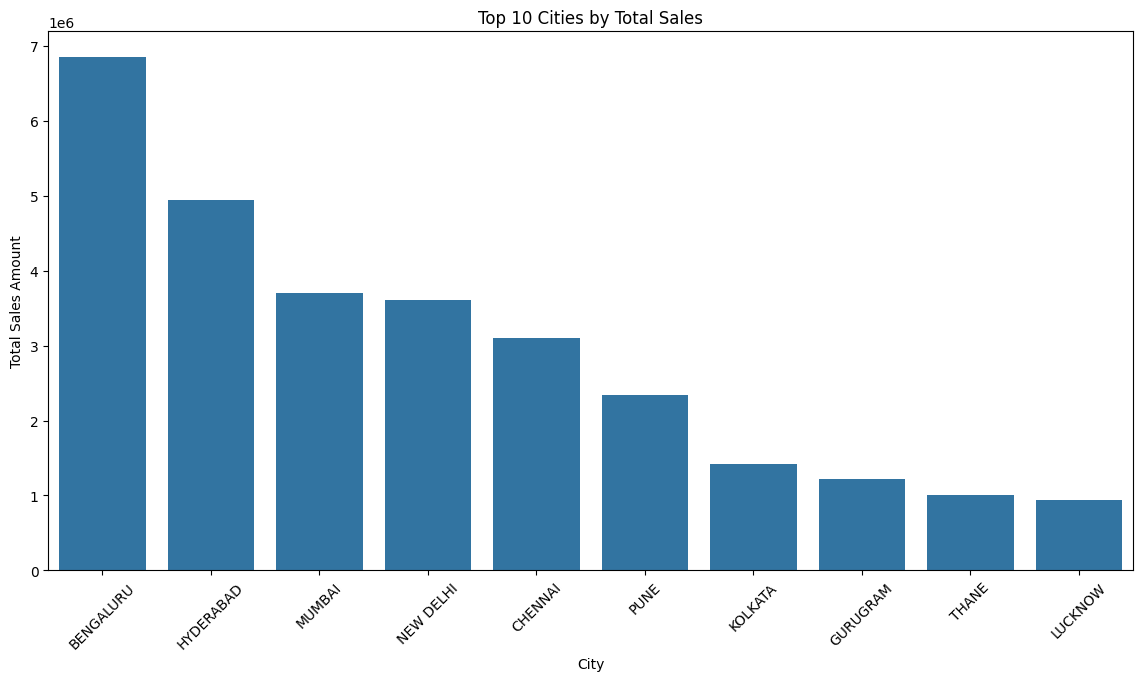

In [14]:
# Use bar plot to show the top 10 cities by total sales, which helps identify major sales locations and potential markets.
plt.figure(figsize=(14, 7))
sns.barplot(x='ship-city', y='Amount', data=sales_per_city.sort_values('Amount', ascending=False).head(10))
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

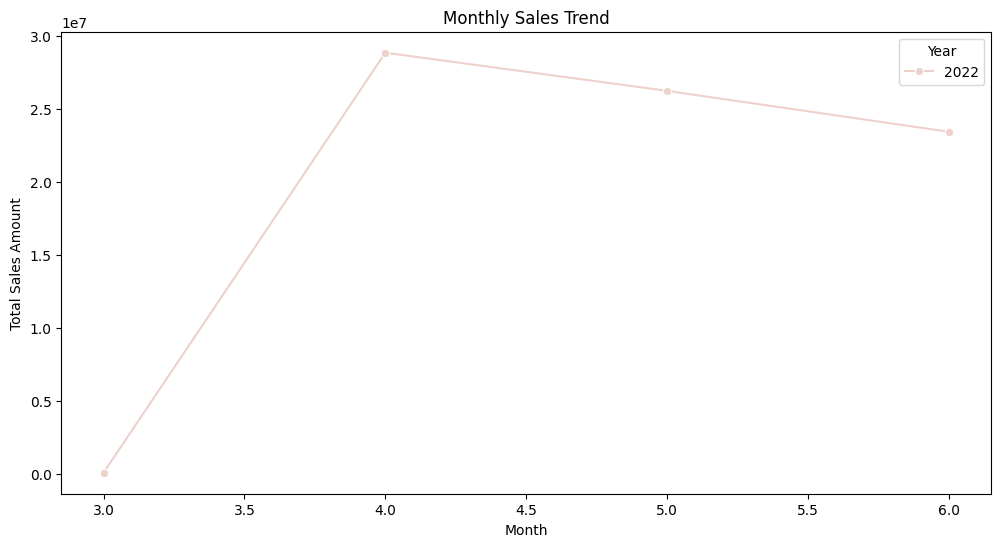

In [15]:
# Visualize monthly sales trend analysis
# This line plot shows the sales trends by month and year to better understand seasonality.
monthly_sales = data_cleaned.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


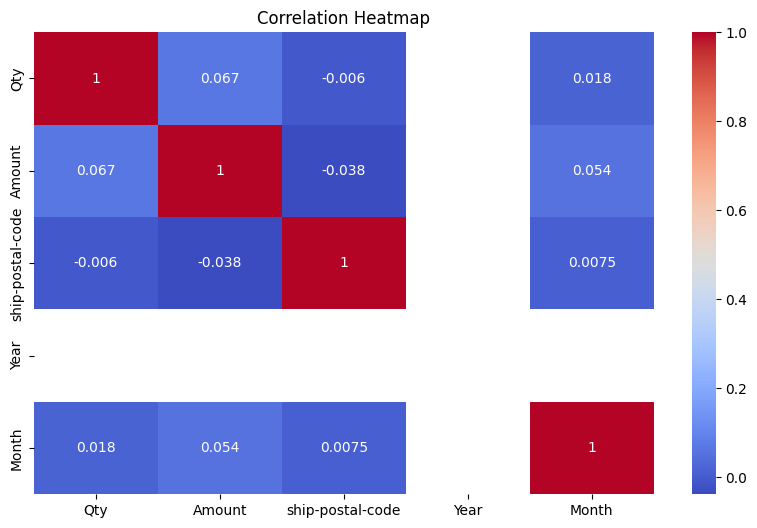

In [17]:
# Correlation Analysis
# Selecting only numerical columns for correlation analysis
numeric_data = data_cleaned.select_dtypes(include=['number'])

# A heatmap is used to visualize correlations between numerical features to identify any strong relationships.
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Saving the cleaned data to a CSV file allows for further analysis or use in future steps of the project.
data_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Sales Analysis/Amazon_Sales_Cleaned.csv', index=False)

In [19]:
def plot_sales_trends(data):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Amount', data=data, ci=None)
    plt.title('Sales Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-19-822a8fd444b6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Amount', data=data, ci=None)


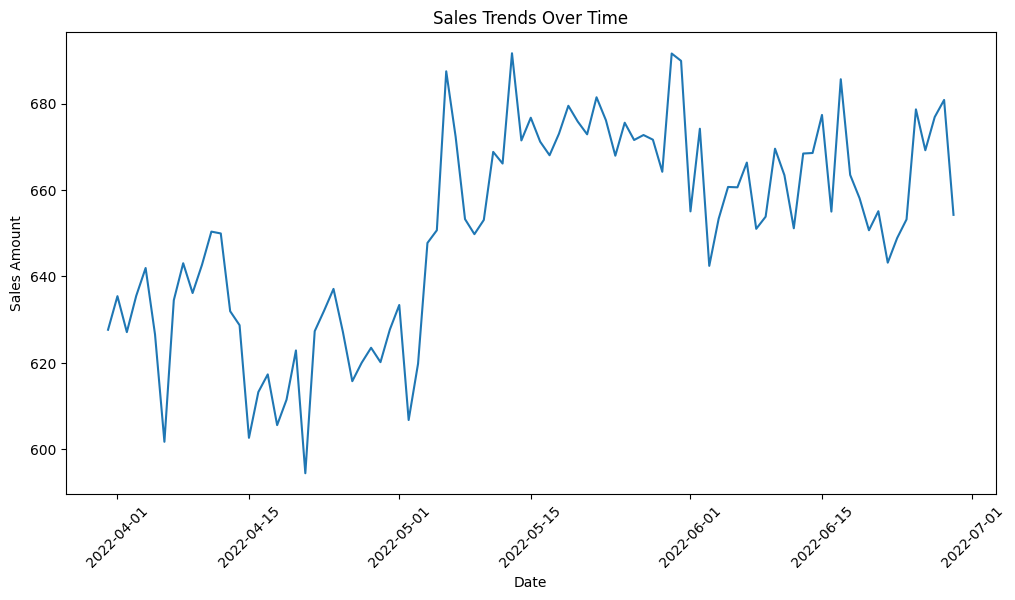

In [20]:
plot_sales_trends(data_cleaned)